In [7]:
import numpy as np
import pandas as pd
import os
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)
from IPython.core.pylabtools import figsize
import seaborn as sns
sns.set(font_scale = 2)
from sklearn.model_selection import train_test_split
import math,os,random
import scipy.stats as stat
from mpl_toolkits.mplot3d import Axes3D

In [8]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg
%matplotlib inline
import cv2
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

import shutil

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

import time
from tqdm import tqdm
from sklearn import datasets
from sklearn import linear_model
from subprocess import check_output
from subprocess import check_output

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


In [9]:
df = pd.read_csv('/content/winequalityN.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [11]:
print(*df.columns, sep='\n')

type
fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality


In [12]:
df.columns = ('type', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality')

In [13]:
df.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [14]:
import seaborn as sns

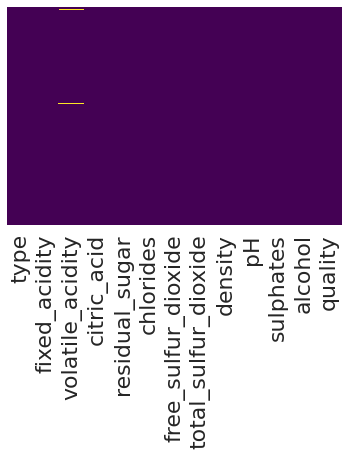

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
Sum = df.isnull().sum()

Percentage = ( df.isnull().sum()/df.isnull().count())

pd.concat([Sum,Percentage], axis =1, keys= ['Sum', 'Percentage'])

,Sum,Percentage
type,0,0.000000
fixed_acidity,10,0.001539
volatile_acidity,8,0.001231
citric_acid,3,0.000462
residual_sugar,2,0.000308
chlorides,2,0.000308
free_sulfur_dioxide,0,0.000000
total_sulfur_dioxide,0,0.000000
density,0,0.000000
pH,9,0.001385


In [17]:
def null_cell(df): 

    total_missing_values = df.isnull().sum() 
    
    missing_values_per = df.isnull().sum()/df.isnull().count() 
    
    null_values = pd.concat([total_missing_values, missing_values_per], axis=1, keys=['total_null', 'total_null_perc']) 
    
    null_values = null_values.sort_values('total_null', ascending=False) 
    
    return null_values[null_values['total_null'] > 0] 

In [18]:
fill_list = (null_cell(df)).index

In [19]:
df_mean = df.copy()

for col in fill_list:
    
    df_mean.loc[:, col].fillna(df_mean.loc[:, col].mean(), inplace=True)

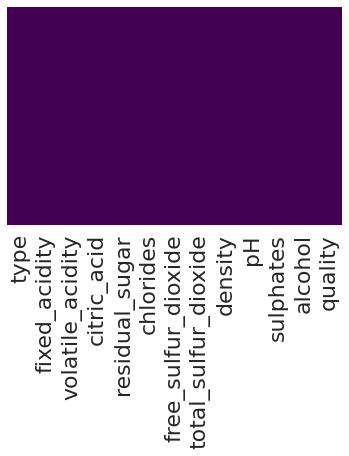

In [20]:
sns.heatmap(df_mean.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
corr_matrix = df_mean.corr()

corr_list = corr_matrix.quality.abs().sort_values(ascending=False).index[0:]

In [22]:
corr_list

Index(['quality', 'alcohol', 'density', 'volatile_acidity', 'chlorides',
       'citric_acid', 'fixed_acidity', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'sulphates', 'residual_sugar', 'pH'],
      dtype='object')

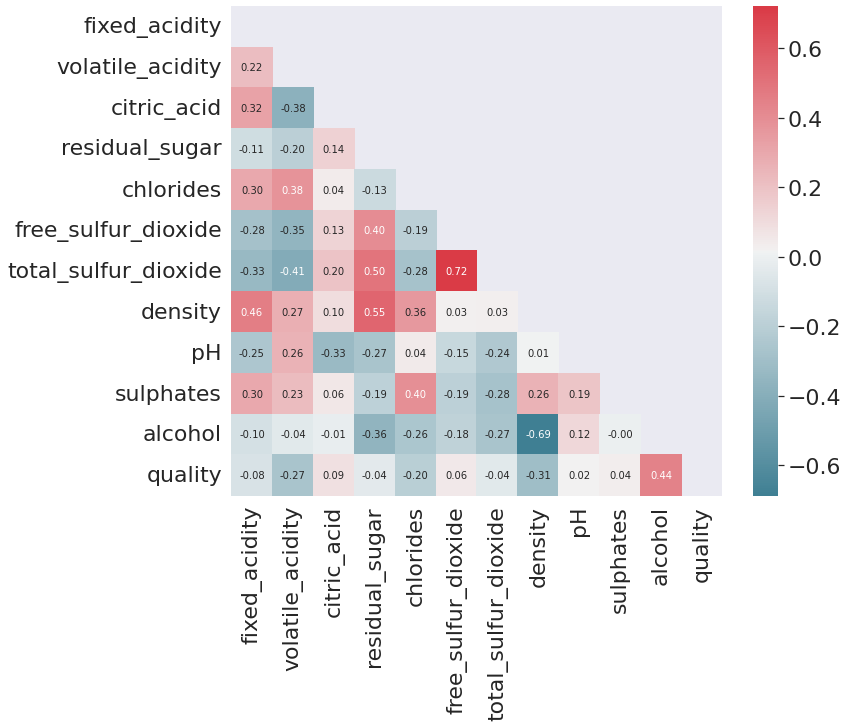

In [23]:
plt.figure(figsize=(11,9))

dropSelf = np.zeros_like(corr_matrix)

dropSelf[np.triu_indices_from(dropSelf)] = True

sns.heatmap(corr_matrix, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)

sns.set(font_scale=1.5)

In [24]:
from scipy.stats import norm 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

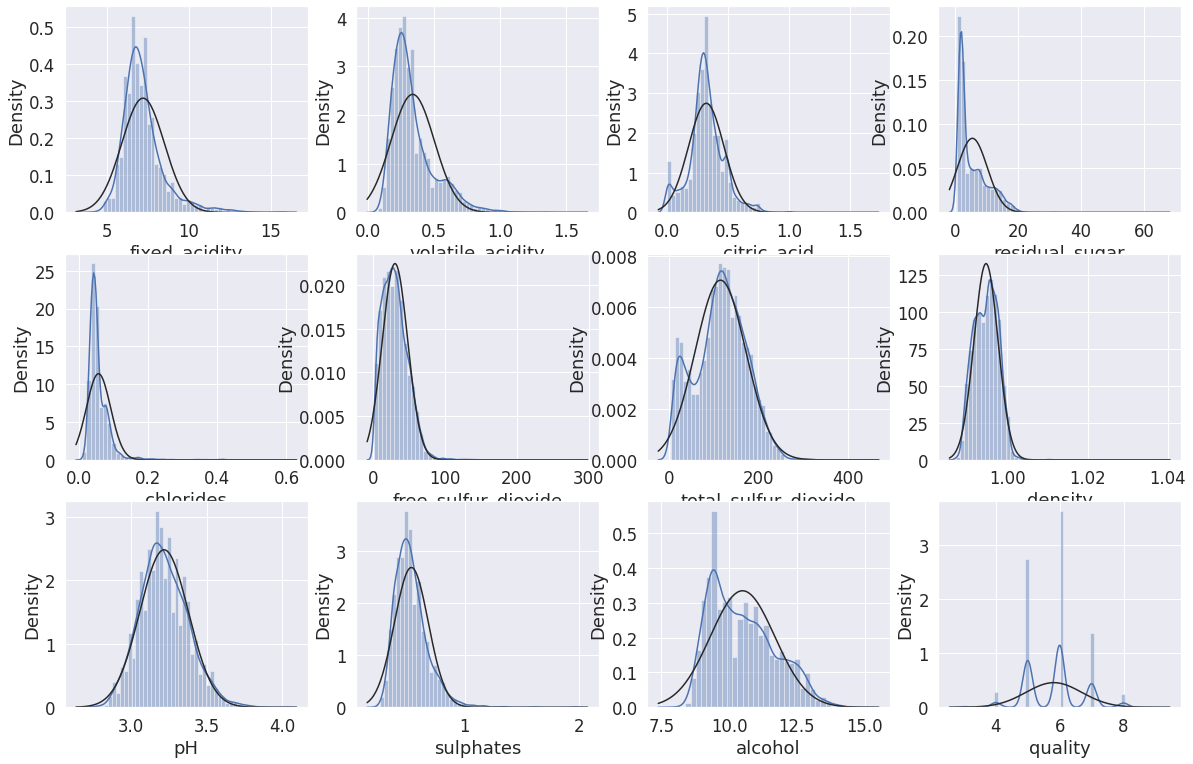

In [25]:
plt.figure(figsize = (20,22))

for i in range(1,13):
    
    plt.subplot(5,4,i)
    
    sns.distplot(df_mean[df_mean.columns[i]], fit=norm)
    

In [26]:
df_bins= df_mean.copy()

In [27]:
bins = [0,5,10]


labels = [0, 1] # 'low'=0, 'high'=1

df_bins['quality_range']= pd.cut(x=df_bins['quality'], bins=bins, labels=labels)

print(df_bins[['quality_range','quality']].head(5))

df_bins = df_bins.drop('quality', axis=1) 

  quality_range  quality
0  1             6      
1  1             6      
2  1             6      
3  1             6      
4  1             6      


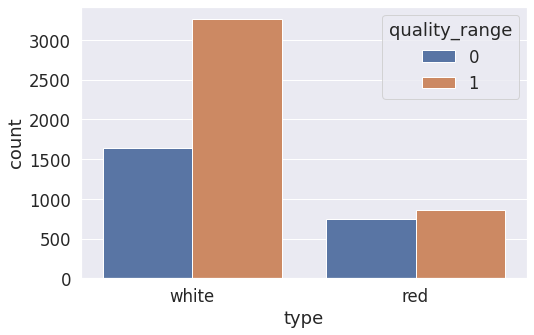

In [28]:
plt.figure(figsize=(8,5))

sns.countplot(x = 'type', hue = 'quality_range', data = df_bins)

plt.show()
# 'low'=0, 'high'=1

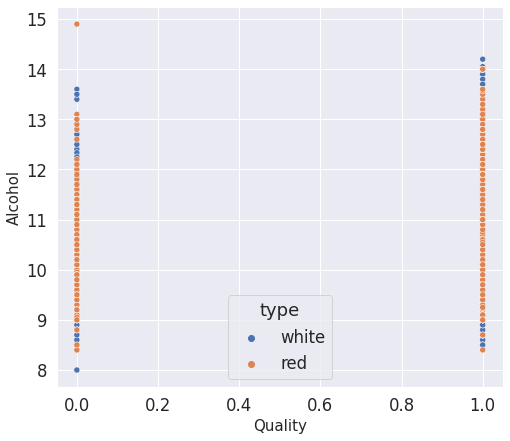

In [29]:
plt.figure(figsize=(8,7))

sns.scatterplot(x='quality_range', 
                y='alcohol', 
                hue='type',
                data=df_bins);

plt.xlabel('Quality',size=15)

plt.ylabel('Alcohol', size =15)

plt.show()

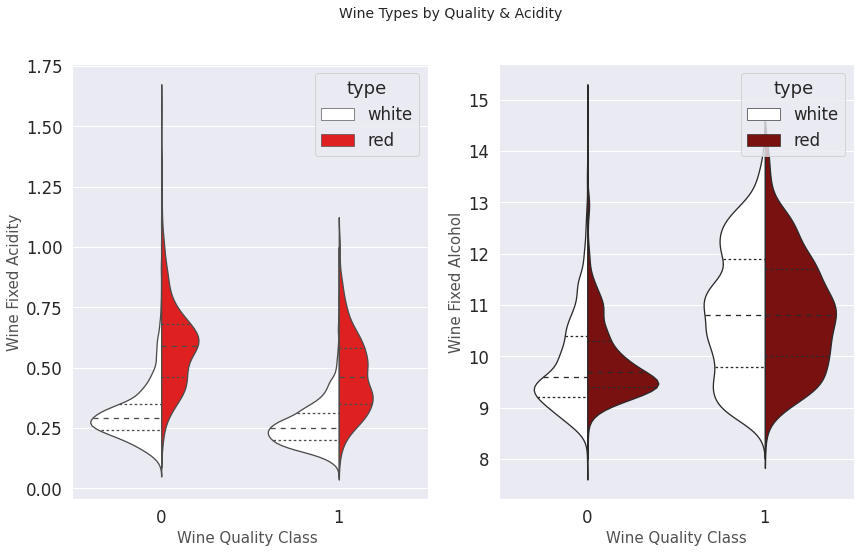

In [30]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

f.suptitle('Wine Types by Quality & Acidity', fontsize=14)

sns.violinplot(x='quality_range', y='volatile_acidity', hue='type', data=df_bins, split=True, inner='quart', linewidth=1.3,
               palette={'red': 'red', 'white': 'white'}, ax=ax1)

ax1.set_xlabel("Wine Quality Class ",size = 15,alpha=0.8)

ax1.set_ylabel("Wine Fixed Acidity",size = 15,alpha=0.8)

sns.violinplot(x='quality_range', y='alcohol', hue='type', data=df_bins, split=True, inner='quart', linewidth=1.3,
               palette={'red': 'darkred', 'white': 'white'}, ax=ax2)

ax2.set_xlabel("Wine Quality Class",size = 15,alpha=0.8)

ax2.set_ylabel("Wine Fixed Alcohol",size = 15,alpha=0.8)

plt.show()

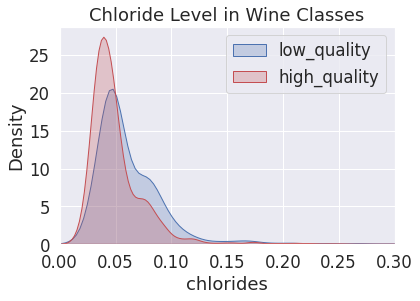

In [31]:
plt.figure(figsize= (6,4))

low_quality = df_bins [df_bins['quality_range']== 0]['chlorides']

high_quality   = df_bins [df_bins['quality_range']== 1][ 'chlorides']

ax = sns.kdeplot(data= low_quality, label= 'low_quality', shade=True, color=None)

ax = sns.kdeplot(data= high_quality,label= 'high_quality',shade=True, color= "r")

plt.title("Chloride Level in Wine Classes")

plt.xlim(0.0,0.3)

plt.legend()

plt.show()

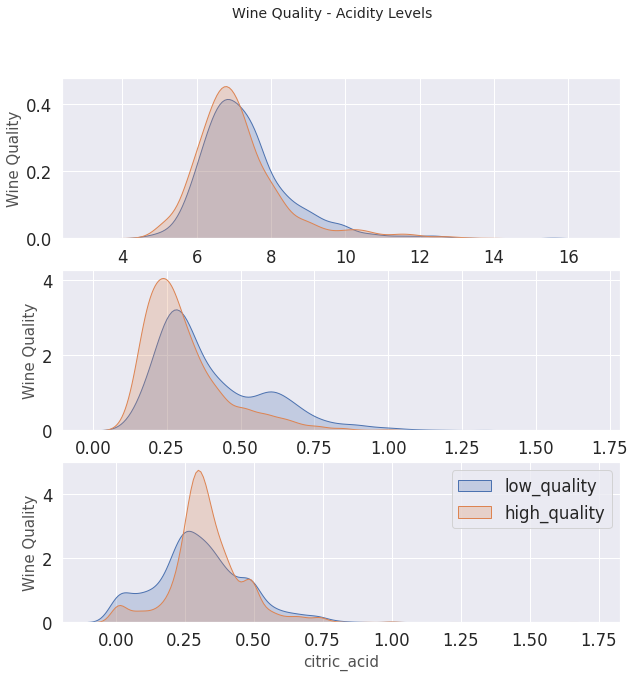

In [32]:
f, (ax1, ax2, ax3) = plt.subplots(3, figsize = (10,10))

f.suptitle('Wine Quality - Acidity Levels', fontsize=14)


fixed_acidity_low_quality    = df_bins [df_bins['quality_range']== 0]['fixed_acidity']

fixed_acidity_high_quality   = df_bins [df_bins['quality_range']== 1]['fixed_acidity']


volatile_acidity_low_quality = df_bins [df_bins['quality_range']== 0]['volatile_acidity']

volatile_acidity_high_quality= df_bins [df_bins['quality_range']== 1]['volatile_acidity']

citric_acid_low_quality      = df_bins [df_bins['quality_range']== 0]['citric_acid']

citric_acid_high_quality     = df_bins [df_bins['quality_range']== 1]['citric_acid']


sns.kdeplot(data=fixed_acidity_low_quality, label="low_quality", shade=True,ax=ax1)

sns.kdeplot(data=fixed_acidity_high_quality, label="high_quality", shade=True, ax=ax1)

ax1.set_xlabel("fixed_acidity",size = 15,alpha=0.8)

ax1.set_ylabel("Wine Quality",size = 15,alpha=0.8)


sns.kdeplot(data=volatile_acidity_low_quality, label="low_quality", shade=True,ax=ax2)

sns.kdeplot(data=volatile_acidity_high_quality, label="high_quality", shade=True, ax=ax2)

ax2.set_xlabel("volatile_acidity",size = 15,alpha=0.8)

ax2.set_ylabel("Wine Quality",size = 15,alpha=0.8)


sns.kdeplot(data=citric_acid_low_quality, label="low_quality", shade=True,ax=ax3)

sns.kdeplot(data=citric_acid_high_quality, label="high_quality", shade=True, ax=ax3)

ax3.set_xlabel("citric_acid",size = 15,alpha=0.8)

ax3.set_ylabel("Wine Quality",size = 15,alpha=0.8)


plt.legend()

plt.show()

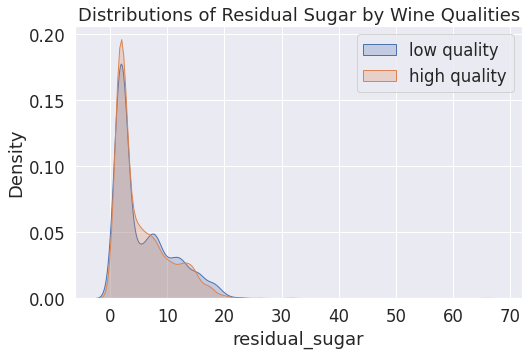

In [33]:
plt.figure(figsize=(8,5))

residual_sugar_low   = df_bins [df_bins['quality_range']== 0]['residual_sugar']

residual_sugar_high  = df_bins [df_bins['quality_range']== 1]['residual_sugar'] 

ax = sns.kdeplot(data= residual_sugar_low, label= 'low quality', shade=True)

ax = sns.kdeplot(data= residual_sugar_high,   label= 'high quality',   shade=True)

plt.title("Distributions of Residual Sugar by Wine Qualities")

plt.legend()

plt.show()

Text(0, 0.5, 'free_sulfur_dioxide')

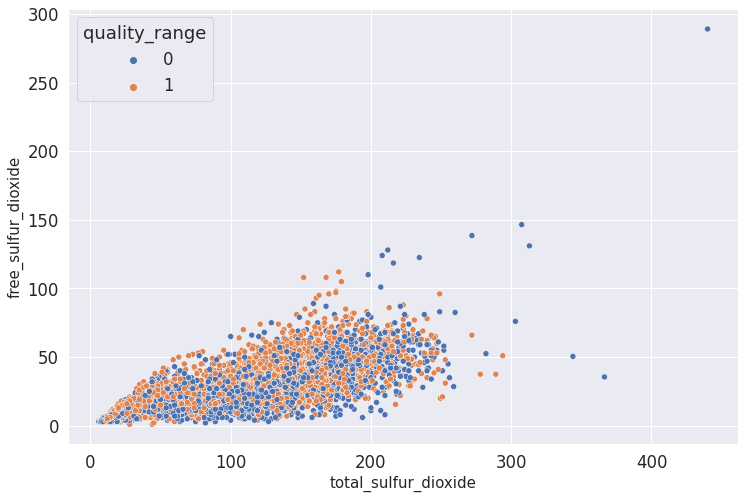

In [34]:
plt.figure(figsize=(12,8))

sns.scatterplot(x='total_sulfur_dioxide', y='free_sulfur_dioxide', hue='quality_range',data=df_bins);

plt.xlabel('total_sulfur_dioxide',size=15)

plt.ylabel('free_sulfur_dioxide', size =15)

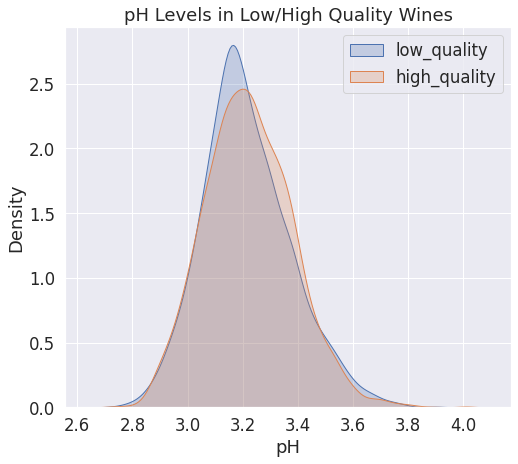

In [35]:
plt.figure(figsize=(8,7))

pH_low_quality  = df_bins [df_bins['quality_range']== 0]['pH']

pH_high_quality = df_bins [df_bins['quality_range']== 1][ 'pH']

ax = sns.kdeplot(data= pH_low_quality, label= 'low_quality', shade=True) 

ax = sns.kdeplot(data= pH_high_quality,label= 'high_quality',   shade=True)

plt.title("pH Levels in Low/High Quality Wines")

plt.xlabel('pH')

plt.legend()

plt.show()

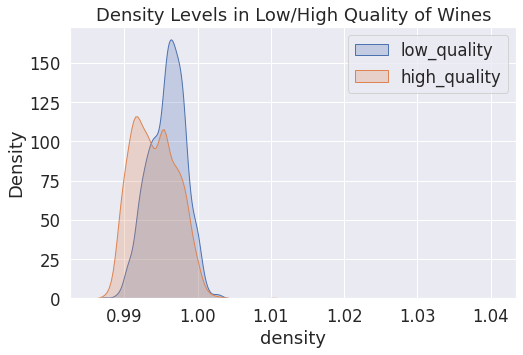

In [36]:
plt.figure(figsize=(8,5))

density_low_quality  = df_bins [df_bins['quality_range']== 0]['density']

density_high_quality = df_bins [df_bins['quality_range']== 1][ 'density']

ax = sns.kdeplot(data= density_low_quality, label= 'low_quality', shade=True) 

ax = sns.kdeplot(data= density_high_quality,label= 'high_quality', shade=True)

plt.title("Density Levels in Low/High Quality of Wines")

plt.xlabel('density')

plt.legend()

plt.show()

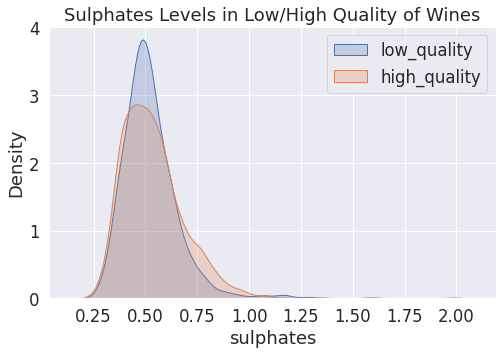

In [37]:
plt.figure(figsize=(8,5))

sulphates_low_quality    = df_mean [df_bins['quality_range']== 0]['sulphates']

sulphates_high_quality   = df_mean [df_bins['quality_range']== 1][ 'sulphates']

ax = sns.kdeplot(data= sulphates_low_quality, label= 'low_quality',  shade=True) 

ax = sns.kdeplot(data= sulphates_high_quality,label= 'high_quality', shade=True)

plt.title("Sulphates Levels in Low/High Quality of Wines")

plt.xlabel('sulphates')

plt.legend()

plt.show()

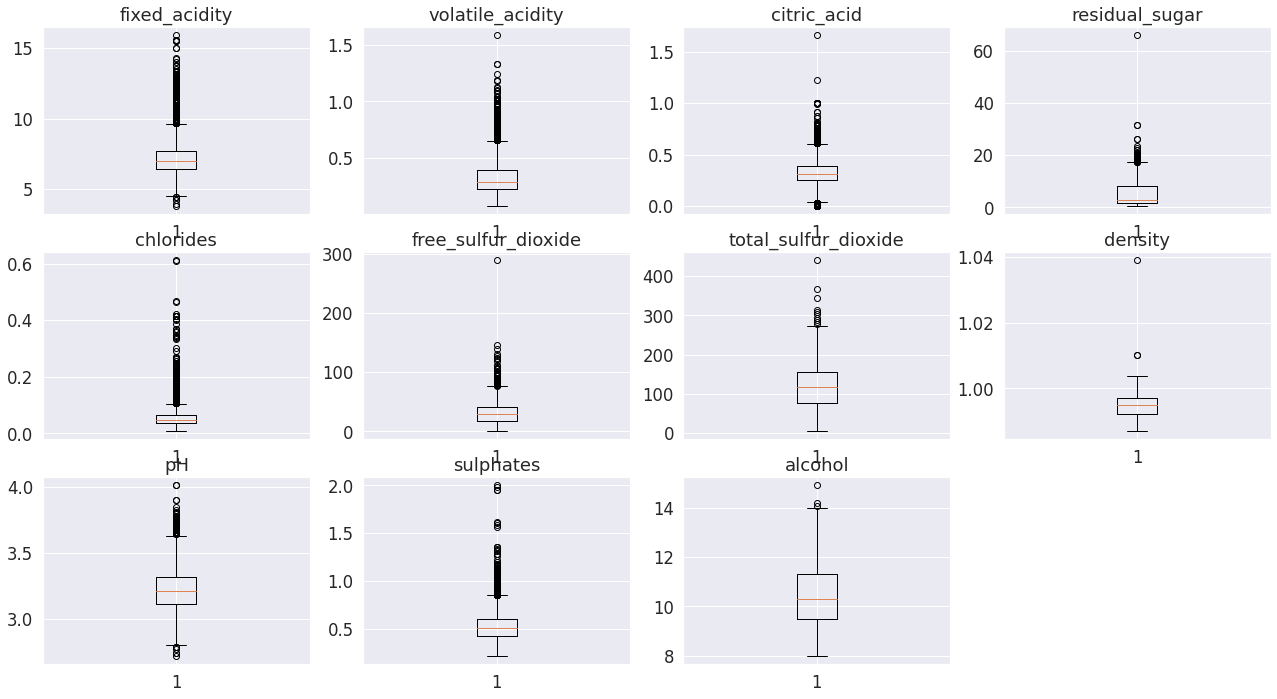

In [38]:
outliers_by_12_variables = ['fixed_acidity', 'volatile_acidity', 'citric_acid',
                            'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
                            'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol'] 

plt.figure(figsize=(22,20))

for i in range(0,11):

    plt.subplot(5, 4, i+1)
    
    plt.boxplot(df_bins[outliers_by_12_variables[i]])
    
    plt.title(outliers_by_12_variables[i])

In [39]:
def winsor(x, multiplier=3): 
    
    upper= x.median() + x.std()*multiplier
    
    for limit in np.arange(0.001, 0.20, 0.001):
    
        if np.max(winsorize(x,(0,limit))) < upper:
            return limit
    
    return None 

In [40]:
from scipy.stats.mstats import winsorize

kolon_isimleri = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
                                  'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']

for i in range(1,len(kolon_isimleri)):

    df_bins[kolon_isimleri[i]] = winsorize(df_bins[kolon_isimleri[i]], (0, winsor(df_bins[kolon_isimleri[i]])))

In [41]:
df_bins.type = df_bins.type.map({'white':0, 'red':1})

In [42]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score 

In [43]:
X = df_bins[['type', 'alcohol', 'density', 'volatile_acidity', 'chlorides',
       'citric_acid', 'fixed_acidity', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'sulphates', 'residual_sugar', 'pH']] 
y = df_bins.quality_range

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)


In [44]:
lr = LogisticRegression(random_state=40)
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=40)

In [45]:
train_accuracy = lr.score(X_train, y_train)

test_accuracy = lr.score(X_test, y_test)

print('One-vs-rest', '-'*35, 
      'Accuracy in Train Group   : {:.2f}'.format(train_accuracy), 
      'Accuracy in Test  Group   : {:.2f}'.format(test_accuracy), sep='\n')

One-vs-rest
-----------------------------------
Accuracy in Train Group   : 0.73
Accuracy in Test  Group   : 0.72


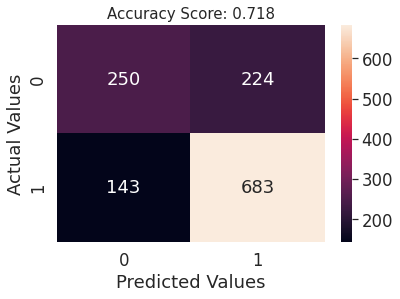

In [46]:
from sklearn.metrics import confusion_matrix as cm

predictions = lr.predict(X_test)

score = round(accuracy_score(y_test, predictions), 3)

cm1 = cm(y_test, predictions)

sns.heatmap(cm1, annot=True, fmt=".0f")

plt.xlabel('Predicted Values')

plt.ylabel('Actual Values')

plt.title('Accuracy Score: {0}'.format(score), size = 15)

plt.show()

In [47]:
pred_test  = lr.predict(X_test)

pred_train = lr.predict(X_train)

In [48]:
from sklearn.metrics import confusion_matrix 


cm = confusion_matrix(y_test,pred_test)
cm

array([[250, 224],
       [143, 683]])

In [49]:
quality_pred = LogisticRegression(random_state=40)

quality_pred.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=40)

In [50]:
confusion_matrix_train = confusion_matrix(y_train,pred_train)

confusion_matrix_test = confusion_matrix(y_test,pred_test)

print('Confusion Matrix Train Data', '--'*20, confusion_matrix_train, sep='\n')

print('Confusion Matrix Test Data', '--'*20, confusion_matrix_test, sep='\n')

Confusion Matrix Train Data
----------------------------------------
[[1049  861]
 [ 550 2737]]
Confusion Matrix Test Data
----------------------------------------
[[250 224]
 [143 683]]


In [51]:
TN = confusion_matrix_test[0][0]

TP = confusion_matrix_test[1][1]

FP = confusion_matrix_test[0][1]

FN = confusion_matrix_test[1][0]

print("(Total) True Negative       :", TN)

print("(Total) True Positive       :", TP)

print("(Total) Negative Positive   :", FP)

print("(Total) Negative Negative   :", FN)

(Total) True Negative       : 250
(Total) True Positive       : 683
(Total) Negative Positive   : 224
(Total) Negative Negative   : 143


In [52]:
FP+FN 

367

In [53]:
from sklearn.metrics import accuracy_score

print("Accuracy Score of Our Model     : ",  quality_pred.score(X_test, y_test))
#print("Accuracy Score of Our Model     : ",  accuracy_score(y_test, pred_test)) # same 

Accuracy Score of Our Model     :  0.7176923076923077


In [54]:
Error_Rate = 1- (accuracy_score(y_test, pred_test))  
Error_Rate

0.28230769230769226

In [55]:
from sklearn.metrics import precision_score

print("precision_score()         : ",  precision_score(y_test, pred_test, average='micro'))

precision_score()         :  0.7176923076923077


In [56]:
from sklearn.metrics import recall_score

print("recall_score()            : ",  recall_score(y_test, pred_test, average='micro'))

recall_score()            :  0.7176923076923077


In [57]:
print(" Specificity Score   : ",  (TN)/(TN + FP)) 

 Specificity Score   :  0.5274261603375527


In [58]:
from sklearn.metrics import f1_score

precision_s = precision_score(y_test, pred_test,average='micro')

recall_s    = recall_score(y_test, pred_test, average='micro')


print("F1_score     : ",  2*((precision_s*recall_s)/(precision_s + recall_s)))
#print("F1_score     : ",  f1_score(y_test, pred_test,average='micro')) #By formula

F1_score     :  0.7176923076923077


In [59]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(y_test,pred_test))

print("f1_score        : {:.2f}".format(f1_score(y_test, pred_test, average='micro')))

print("recall_score    : {:.2f}".format(recall_score(y_test, pred_test, average='micro')))

print("precision_score : {:.2f}".format(precision_score(y_test, pred_test, average='micro')))

print('\n')

metrics =  precision_recall_fscore_support(y_test, pred_test)

print("Precision       :" , metrics[0]) 
#print("Recall          :" , metrics[1]) 

print("F1 Score        :" , metrics[2]) 

              precision    recall  f1-score   support

           0       0.64      0.53      0.58       474
           1       0.75      0.83      0.79       826

    accuracy                           0.72      1300
   macro avg       0.69      0.68      0.68      1300
weighted avg       0.71      0.72      0.71      1300

f1_score        : 0.72
recall_score    : 0.72
precision_score : 0.72


Precision       : [0.63613232 0.75303197]
F1 Score        : [0.57670127 0.78822851]


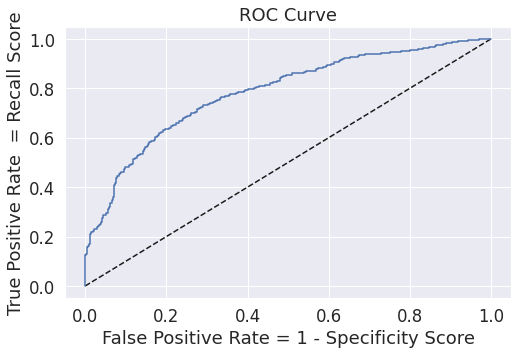

In [60]:
probs = quality_pred.predict_proba(X_test)[:,1]  #Predict probabilities for the test data

from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y_test, probs) #Get the ROC Curve


import matplotlib.pyplot as plt


plt.figure(figsize=(8,5))
# Plot ROC curve

plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr, tpr)


plt.xlabel('False Positive Rate = 1 - Specificity Score')

plt.ylabel('True Positive Rate  = Recall Score')

plt.title('ROC Curve')

plt.show()

In [61]:
print('AUC Değeri : ', roc_auc_score(y_test.values, probs))

AUC Değeri :  0.7835151868084715


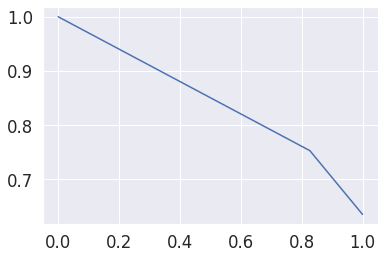

In [62]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, pred_test)

plt.plot(recall, precision)

plt.show()

In [63]:
from sklearn.metrics import log_loss

print("Log-Loss)    : " , log_loss(y_test.values, probs))

print("Error Rate   : " , 1- accuracy_score(y_test.values, pred_test))

Log-Loss)    :  0.5321876483621648
Error Rate   :  0.28230769230769226


In [64]:
C_values = [0.001,0.01,0.1,1,10,100, 1000]

accuracy_df = pd.DataFrame(columns = ['C_values','Accuracy'])

accuracy_values = pd.DataFrame(columns=['C Value', 'Accuracy Train', 'Accuracy Test'])

for c in C_values:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)

    lr.fit(X_train,y_train)
    
    accuracy_values = accuracy_values.append({'C Value': c,
                                                    'Accuracy Train' : lr.score(X_train, y_train),
                                                    'Accuracy Test': lr.score(X_test, y_test)
                                                    }, ignore_index=True)
display(accuracy_values)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


,C Value,Accuracy Train,Accuracy Test
0,0.001,0.687704,0.668462
1,0.010,0.711757,0.696923
2,0.100,0.727535,0.720000
3,1.000,0.728497,0.717692
4,10.000,0.733308,0.727692
5,100.000,0.727535,0.726923
6,1000.000,0.730229,0.724615


In [65]:
df_mean.head(1)

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6


In [66]:
df_bins3= df_mean.copy()

In [67]:
df_bins3.type = df_bins3.type.map({'white':0, 'red':1})

In [68]:
bins = [0,4,7,10]

labels = [0,1,2] # 'low'=0,'average'=1, 'high'=2

df_bins3['quality_range']= pd.cut(x=df_bins3['quality'], bins=bins, labels=labels)

#df_bins3.type = df_bins3.type.map({'white':0, 'red':1})

print(df_bins3[['quality_range','quality']].head(5))


  quality_range  quality
0  1             6      
1  1             6      
2  1             6      
3  1             6      
4  1             6      


In [69]:
X = df_bins3[['type', 'alcohol', 'density', 'volatile_acidity', 'chlorides',
       'citric_acid', 'fixed_acidity', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'sulphates', 'residual_sugar', 'pH']]

y = df_bins3.quality_range

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)


In [70]:
X_test.head()

,type,alcohol,density,volatile_acidity,chlorides,citric_acid,fixed_acidity,free_sulfur_dioxide,total_sulfur_dioxide,sulphates,residual_sugar,pH
369,0,11.6,0.99410,0.39,0.044,0.35,7.1,26.0,72.0,0.29,12.5,3.17
6243,1,10.2,0.99613,0.44,0.063,0.24,8.2,10.0,28.0,0.53,2.3,3.25
3374,0,9.5,0.99341,0.19,0.045,0.21,5.9,57.0,135.0,0.44,1.7,3.32
1009,0,10.5,0.99300,0.15,0.055,0.39,8.3,32.0,146.0,0.39,1.3,3.08
220,0,11.0,0.99390,0.27,0.036,0.36,7.5,45.0,164.0,0.33,7.0,3.03


In [71]:
lr    = LogisticRegression(random_state=40)

lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=40)

In [72]:
train_accuracy = lr.score(X_train, y_train)

test_accuracy = lr.score(X_test, y_test)

print('One-vs-rest', '-'*35, 
      'Accuracy Score of Train Model : {:.2f}'.format(train_accuracy), 
      'Accuracy Score of Test  Model : {:.2f}'.format(test_accuracy), sep='\n')

One-vs-rest
-----------------------------------
Accuracy Score of Train Model : 0.93
Accuracy Score of Test  Model : 0.93


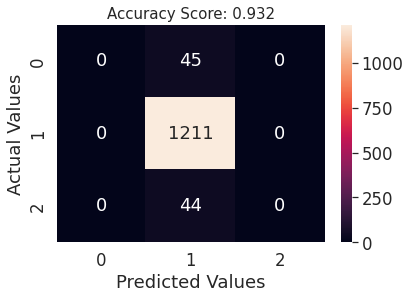

In [73]:
from sklearn.metrics import confusion_matrix as cm

predictions = lr.predict(X_test)

score = round(accuracy_score(y_test, predictions), 3)

cm1 = cm(y_test, predictions)

sns.heatmap(cm1, annot=True, fmt=".0f")

plt.xlabel('Predicted Values')

plt.ylabel('Actual Values')

plt.title('Accuracy Score: {0}'.format(score), size = 15)

plt.show()

In [74]:
y_pred = lr.predict(X_test)

y_pred[y_pred == 2]

array([], dtype=int64)

In [75]:
cm = confusion_matrix(y_test,y_pred)

cm

array([[   0,   45,    0],
       [   0, 1211,    0],
       [   0,   44,    0]])

In [76]:
quality_pred = LogisticRegression(random_state=40)

quality_pred.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=40)

In [77]:
pred_train = lr.predict(X_train)

pred_test  = lr.predict(X_test)

In [78]:
confusion_matrix_train = confusion_matrix(y_train,pred_train)

confusion_matrix_test = confusion_matrix(y_test,pred_test)

print('Confusion Matrix Train Data', '--'*20, confusion_matrix_train, sep='\n')

print('Confusion Matrix Test  Data ', '--'*20, confusion_matrix_test, sep='\n')

Confusion Matrix Train Data
----------------------------------------
[[   0  201    0]
 [   0 4842    0]
 [   0  154    0]]
Confusion Matrix Test  Data 
----------------------------------------
[[   0   45    0]
 [   0 1211    0]
 [   0   44    0]]


In [79]:
#TN = confusion_matrix_test[0][0]
#TP = confusion_matrix_test[1][1]
#FP = confusion_matrix_test[0][1]
#FN = confusion_matrix_test[1][0]

print("(Total) True Negative       :", TN)

print("(Total) True Positive       :", TP)

print("(Total) Negative Positive   :", FP)

print("(Total) Negative Negative   :", FN)

(Total) True Negative       : 250
(Total) True Positive       : 683
(Total) Negative Positive   : 224
(Total) Negative Negative   : 143


In [80]:
from sklearn.metrics import accuracy_score

print("Accuracy Score of Test Model : ",  quality_pred.score(X_test, y_test))

Accuracy Score of Test Model :  0.9315384615384615


In [81]:
Error_Rate = 1 - (accuracy_score(y_test, pred_test))

Error_Rate

0.06846153846153846

In [82]:
from sklearn.metrics import precision_score

print("precision_score        : ",  precision_score(y_test, pred_test, average='micro'))

precision_score        :  0.9315384615384615


In [83]:
from sklearn.metrics import recall_score

print("recall_score        : ",  recall_score(y_test, pred_test, average='micro'))

recall_score        :  0.9315384615384615


In [84]:
from sklearn.metrics import f1_score

precision_s = precision_score(y_test, pred_test,average='micro')

recall_s    = recall_score(y_test, pred_test, average='micro')


print("F1_score     : ",  2*((precision_s*recall_s)/(precision_s + recall_s)))# by mathematical formula

print("f1_score()   : ",  f1_score(y_test, pred_test,average='micro'))  #By formula

F1_score     :  0.9315384615384615
f1_score()   :  0.9315384615384615


In [86]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(y_test,pred_test) )

print("f1_score()         : {:.2f}".format(f1_score(y_test, pred_test, average='micro')))

print("recall_score()     : {:.2f}".format(recall_score(y_test, pred_test, average='micro')))

print("precision_score()  : {:.2f}".format(precision_score(y_test, pred_test, average='micro')))

print('\n')

metrikler =  precision_recall_fscore_support(y_test, pred_test)

print("Precision   :" , metrics[0]) 

print("Recall      :" , metrics[1]) 

print("F1 Score    :" , metrics[2]) 


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        45
           1       0.93      1.00      0.96      1211
           2       0.00      0.00      0.00        44

    accuracy                           0.93      1300
   macro avg       0.31      0.33      0.32      1300
weighted avg       0.87      0.93      0.90      1300

f1_score()         : 0.93
recall_score()     : 0.93
precision_score()  : 0.93


Precision   : [0.63613232 0.75303197]
Recall      : [0.52742616 0.82687651]
F1 Score    : [0.57670127 0.78822851]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [87]:
from sklearn.preprocessing import LabelBinarizer

In [88]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    
    lb = LabelBinarizer()
    
    lb.fit(y_test)
    
    y_test = lb.transform(y_test)
    
    y_pred = lb.transform(y_pred)
    
    return roc_auc_score(y_test, y_pred, average=average)

In [89]:
print('AUC Değeri : ', multiclass_roc_auc_score(y_test.values, y_pred))

AUC Değeri :  0.5


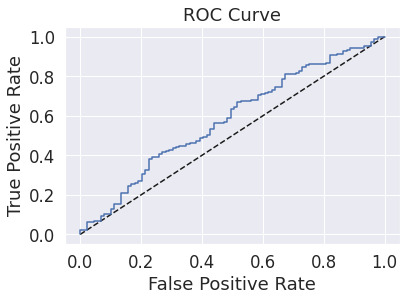

In [90]:
probs = quality_pred.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y_test, probs, pos_label=1)


# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr, tpr)

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC Curve')

plt.show()

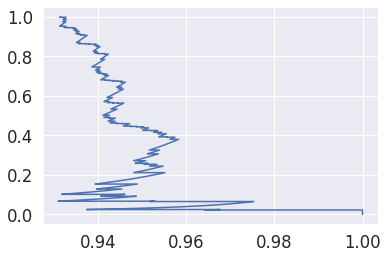

In [91]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, probs, pos_label=1)

plt.plot(precision, recall)

plt.show()

In [92]:
C_values = [0.001,0.01,0.1,1,10,100, 1000]

accuracy_df = pd.DataFrame(columns = ['C_values','Accuracy'])

accuracy_values = pd.DataFrame(columns=['C Value', 'Accuracy Train', 'Accuracy Test'])

for c in C_values: 
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)

    lr.fit(X_train,y_train)
    
    accuracy_values = accuracy_values.append({'C Value': c,
                                                    'Accuracy Train' : lr.score(X_train, y_train),
                                                    'Accuracy Test': lr.score(X_test, y_test)
                                                    }, ignore_index=True)
display(accuracy_values)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


,C Value,Accuracy Train,Accuracy Test
0,0.001,0.931691,0.931538
1,0.010,0.931691,0.931538
2,0.100,0.931691,0.931538
3,1.000,0.931691,0.931538
4,10.000,0.931691,0.931538
5,100.000,0.931691,0.931538
6,1000.000,0.931691,0.931538


In [93]:
df_mean_imb = df_mean.copy() 

In [94]:
bins = [0,4,10] 


labels = [0, 1] # 'low'=0, 'high'=1 

df_mean_imb['quality_range']= pd.cut(x=df_mean_imb['quality'], bins=bins, labels=labels) 

print(df_mean_imb[['quality_range','quality']].head(5)) 

df_mean_imb = df_mean_imb.drop('quality', axis=1) #

  quality_range  quality
0  1             6      
1  1             6      
2  1             6      
3  1             6      
4  1             6      


Low Quality  0   : %96.21
High Quality 1   : %3.79


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


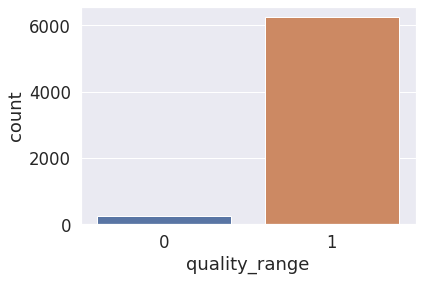

In [95]:
sns.countplot(df_mean_imb.quality_range)
 #'low'=0, 'high'=1
    
print("Low Quality  0   : %{:.2f}".format(sum(df_mean_imb.quality_range)/len(df_mean_imb.quality_range)*100))

print("High Quality 1   : %{:.2f}".format((len(df_mean_imb.quality_range)-sum(df_mean_imb.quality_range))/len(df_mean_imb.quality_range)*100))

In [96]:
balance = (df_mean_imb.quality_range.value_counts()[1]/df_mean_imb.quality_range.shape[0])*100

print('Data Quality Percentage:\n', balance,'%')

Data Quality Percentage:
 3.7863629367400335 %


In [97]:
from sklearn.utils import resample 

from imblearn.over_sampling import SMOTE 

smote = SMOTE() 

In [98]:
df_mean_imb.type = df_mean_imb.type.map({'white':0, 'red':1}) 

(6497, 12) (6497,)
(12502, 12) (12502,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


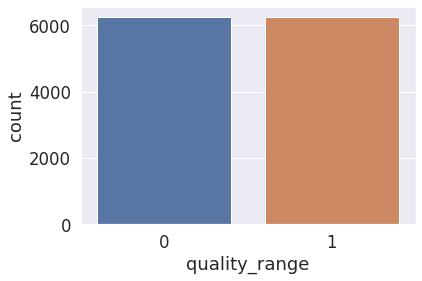

In [99]:
X =  df_mean_imb.drop(['quality_range'], axis=1) 

y =  df_mean_imb.quality_range 

X_sm, y_sm =smote.fit_resample(X,y) 

print(X.shape, y.shape) 

print(X_sm.shape, y_sm.shape) 

sns.countplot(y_sm) 

In [100]:
def create_model(X, y): 

    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=40, stratify = y) 

    logreg_model = LogisticRegression() 

    logreg_model.fit(X_train, y_train) 

    pred_train = logreg_model.predict(X_train) 
    
    pred_test = logreg_model.predict(X_test) 
    
    confusion_matrix_train = confusion_matrix(y_train, pred_train) 
    
    confusion_matrix_test = confusion_matrix(y_test, pred_test) 
    
    print("Accuracy of Test Model : ",  logreg_model.score(X_test, y_test)) 
    
    print("Train Data Set") 
    
    print(classification_report(y_train,pred_train) ) 
    
    print("Test Data Set ") 
    
    print(classification_report(y_test,pred_test) ) 
    
    return  None 

In [105]:
create_model(X_sm,y_sm) 

Accuracy of Test Model :  0.7457017193122751
Train Data Set
              precision    recall  f1-score   support

           0       0.77      0.71      0.74      5000
           1       0.73      0.78      0.76      5001

    accuracy                           0.75     10001
   macro avg       0.75      0.75      0.75     10001
weighted avg       0.75      0.75      0.75     10001

Test Data Set 
              precision    recall  f1-score   support

           0       0.76      0.72      0.74      1251
           1       0.73      0.77      0.75      1250

    accuracy                           0.75      2501
   macro avg       0.75      0.75      0.75      2501
weighted avg       0.75      0.75      0.75      2501



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [106]:
df_bins.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality_range
0,0,7.0,0.27,0.36,17.2,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [102]:
X = df_bins.drop(['quality_range'], axis=1)

y = df_bins.quality_range
y = np.array(y)


In [103]:
plt.style.use('fivethirtyeight')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

print("Number of Rows in    Training dataset :  {} ".format(len(X_train)))

print("Number of Targets in Training dataset :  {} ".format(len(y_train)))

print("Number of Rows in    Test dataset :  {} ".format(len(X_test)))

print("Number of Targets in Test dataset :  {} ".format(len(y_test)))

Number of Rows in    Training dataset :  4547 
Number of Targets in Training dataset :  4547 
Number of Rows in    Test dataset :  1950 
Number of Targets in Test dataset :  1950 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 1000.0)

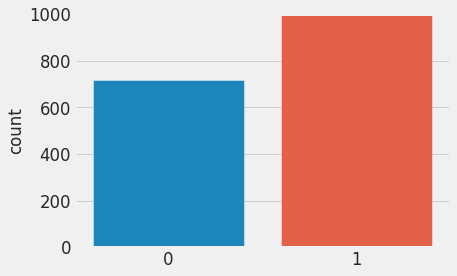

In [104]:
sns.countplot(y_test)

plt.ylim((0,1000))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


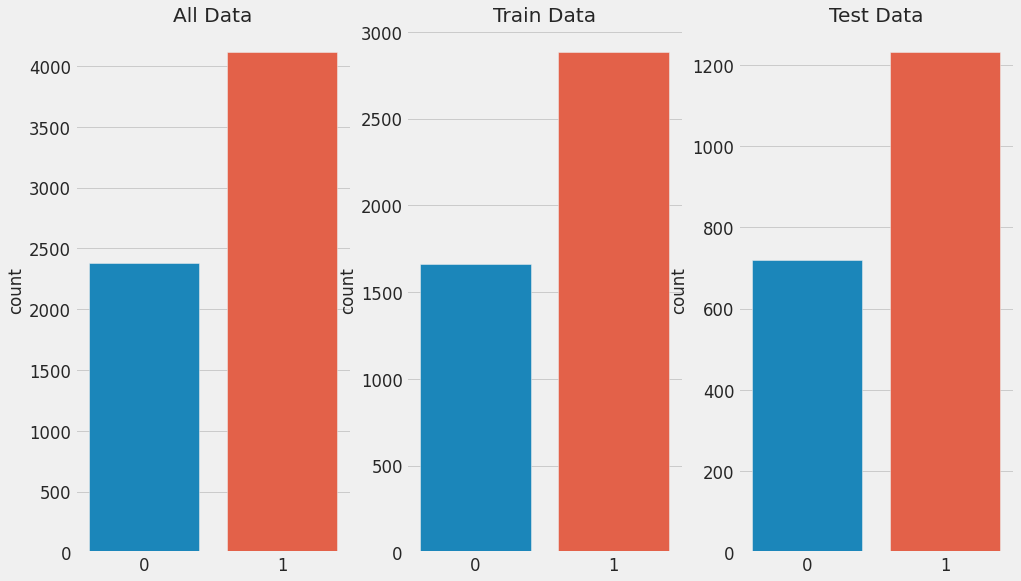

In [107]:
plt.figure(figsize=(15,9))

y_list = [y, y_train, y_test]

titles = ['All Data','Train Data', 'Test Data']

for i in range(1,4):

    plt.subplot(1,3,i)
    
    sns.countplot(y_list[i-1])
    
    plt.title(titles[i-1])
    


In [108]:
print("Tüm veri kümesi '0' yüzdesi : %{:.0f} ".format(len(y[y==0])/len(y)*100))

print("Test verisi '0' yüzdesi     : %{:.0f} ".format(len(y_test[y_test==0])/len(y_test)*100))

print("Eğitim verisi '0' yüzdesi   : %{:.0f} ".format(len(y_train[y_train==0])/len(y_train)*100))

Tüm veri kümesi '0' yüzdesi : %37 
Test verisi '0' yüzdesi     : %37 
Eğitim verisi '0' yüzdesi   : %37 


In [109]:
LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

tahmin_eğitim = model.predict(X_train)

tahmin_test = model.predict(X_test)

model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.7410256410256411

In [110]:
from sklearn.model_selection import KFold 

kf = KFold(n_splits=5, shuffle=True, random_state=40) 

In [111]:
X.loc[[3,5]] 


,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
5,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1


In [112]:
parcalar = kf.split(X)

for num, (train_index, test_index) in enumerate(parcalar): 

    print("{}.Training Set Size : {}".format(num+1,len(train_index)))  
    
    print("{}.Test Set Size     : {}".format(num+1,len(test_index))) 
    
    print('-'*26)

1.Training Set Size : 5197
1.Test Set Size     : 1300
--------------------------
2.Training Set Size : 5197
2.Test Set Size     : 1300
--------------------------
3.Training Set Size : 5198
3.Test Set Size     : 1299
--------------------------
4.Training Set Size : 5198
4.Test Set Size     : 1299
--------------------------
5.Training Set Size : 5198
5.Test Set Size     : 1299
--------------------------


In [113]:
from sklearn.metrics import mean_squared_error 

model2 = LogisticRegression()

pieces = kf.split(X)

accuracy_list = []

for i, (egitim_indeks, test_indeks) in enumerate(pieces):
    
    X_train, y_train = X.loc[train_index], y[train_index]

    X_test, y_test = X.loc[test_indeks], y[test_indeks]
    
    model2.fit(X_train, y_train)
    
    tahmin = model2.predict(X_test)
    
    accuracy_value = model2.score(X_test, y_test)  
    
    accuracy_list.append(accuracy_value)
    
    print("{}.Accuracy Value of Pieces: {:.3f}".format(i+1, accuracy_value))
    
    print("-"*30)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


1.Accuracy Value of Pieces: 0.722
------------------------------
2.Accuracy Value of Pieces: 0.735
------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


3.Accuracy Value of Pieces: 0.747
------------------------------
4.Accuracy Value of Pieces: 0.736
------------------------------
5.Accuracy Value of Pieces: 0.711
------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [114]:
print("Avarage Accuracy Value : {:.2f}".format(np.mean(accuracy_list)))

Avarage Accuracy Value : 0.73


In [115]:
from sklearn.model_selection import cross_validate, cross_val_score

In [116]:
lrm = LogisticRegression()

cv = cross_validate(estimator=lrm,
                     X=X,
                     y=y,
                     cv=10,return_train_score=True
                    )
print('Test Scores            : ', cv['test_score'], sep = '\n')

print("-"*50)

print('Train Scores           : ', cv['train_score'], sep = '\n')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Test Scores            : 
[0.64769231 0.67384615 0.74153846 0.70153846 0.73692308 0.73538462
 0.73538462 0.82896764 0.62249615 0.76887519]
--------------------------------------------------
Train Scores           : 
[0.75183855 0.74243202 0.74003763 0.74739182 0.72550026 0.73661707
 0.73730118 0.72913817 0.73905609 0.73119015]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [117]:
print('Mean of Test Set  : ', cv['test_score'].mean())

print('Mean of Train Set : ', cv['train_score'].mean())

Mean of Test Set  :  0.7192646675358539
Mean of Train Set :  0.7380502927243898


In [118]:
cv = cross_validate(estimator=lrm, 
                     X=X,
                     y=y,
                     cv=10,return_train_score=True,
                     scoring = ['accuracy', 'r2', 'precision']
                    )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [119]:
print('Test Set Accuracy   Mean      : {:.2f}'.format(cv['test_accuracy'].mean()))

print('Test Set R Square   Mean      : {:.2f}'.format(cv['test_r2'].mean()))

print('Test Set Precision  Mean      : {:.2f}'.format(cv['test_precision'].mean()))

print('Train Set Accuracy  Mean      : {:.2f}'.format(cv['train_accuracy'].mean()))

print('Train Set R Square  Mean      : {:.2f}'.format(cv['train_r2'].mean()))

print('Train Set Precision Mean      : {:.2f}'.format(cv['train_precision'].mean()))

Test Set Accuracy   Mean      : 0.72
Test Set R Square   Mean      : -0.21
Test Set Precision  Mean      : 0.76
Train Set Accuracy  Mean      : 0.74
Train Set R Square  Mean      : -0.13
Train Set Precision Mean      : 0.77


In [120]:
cv = cross_val_score(estimator=lrm,
                     X=X,
                     y=y,
                     cv=10                    
                    )
print('Model Scores           : ', cv, sep = '\n')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Model Scores           : 
[0.64769231 0.67384615 0.74153846 0.70153846 0.73692308 0.73538462
 0.73538462 0.82896764 0.62249615 0.76887519]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [121]:
from sklearn.model_selection import cross_val_predict 

In [122]:
y_pred = cross_val_predict(estimator=lrm, X=X, y=y, cv=10)

print(y_pred[0:10])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[1 0 1 1 1 1 0 1 0 1]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [123]:
logreg = LogisticRegression()

print(logreg.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [124]:
parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
                "penalty": ['l1', 'l2']
                }

In [125]:
parameters

{'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
 'penalty': ['l1', 'l2']}

In [126]:
from sklearn.model_selection import GridSearchCV


grid_cv = GridSearchCV(estimator=logreg,
                       param_grid = parameters,
                       cv = 10
                      )

grid_cv.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'penalty': ['l1', 'l2']})

In [127]:
print("The Best Parametre : ", grid_cv.best_params_)

print("The Best Score     : ", grid_cv.best_score_)

The Best Parametre :  {'C': 100, 'penalty': 'l2'}
The Best Score     :  0.7292672750977836


In [128]:
results = grid_cv.cv_results_

df = pd.DataFrame(results)

df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001358,0.000402,0.000000,0.000000,0.00001,l1,"{'C': 1e-05, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
1,0.076865,0.010520,0.002769,0.000069,0.00001,l2,"{'C': 1e-05, 'penalty': 'l2'}",0.636923,0.635385,0.643077,0.635385,0.635385,0.633846,0.633846,0.631741,0.633282,0.6302,0.634907,0.003295,10
2,0.001075,0.000075,0.000000,0.000000,0.0001,l1,"{'C': 0.0001, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
3,0.111363,0.015280,0.003107,0.000886,0.0001,l2,"{'C': 0.0001, 'penalty': 'l2'}",0.646154,0.644615,0.663077,0.650769,0.652308,0.626154,0.638462,0.617874,0.633282,0.6302,0.640289,0.012974,9
4,0.001034,0.000094,0.000000,0.000000,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15


In [129]:
df = df[['param_penalty','param_C', 'mean_test_score']]

df = df.sort_values(by='mean_test_score', ascending = False)

df

,param_penalty,param_C,mean_test_score
15,l2,100,0.729267
19,l2,10000,0.721261
11,l2,1,0.719265
17,l2,1000,0.718338
13,l2,10,0.717267
9,l2,0.1,0.711726
7,l2,0.01,0.683089
5,l2,0.001,0.665533
3,l2,0.0001,0.640289
1,l2,0.00001,0.634907


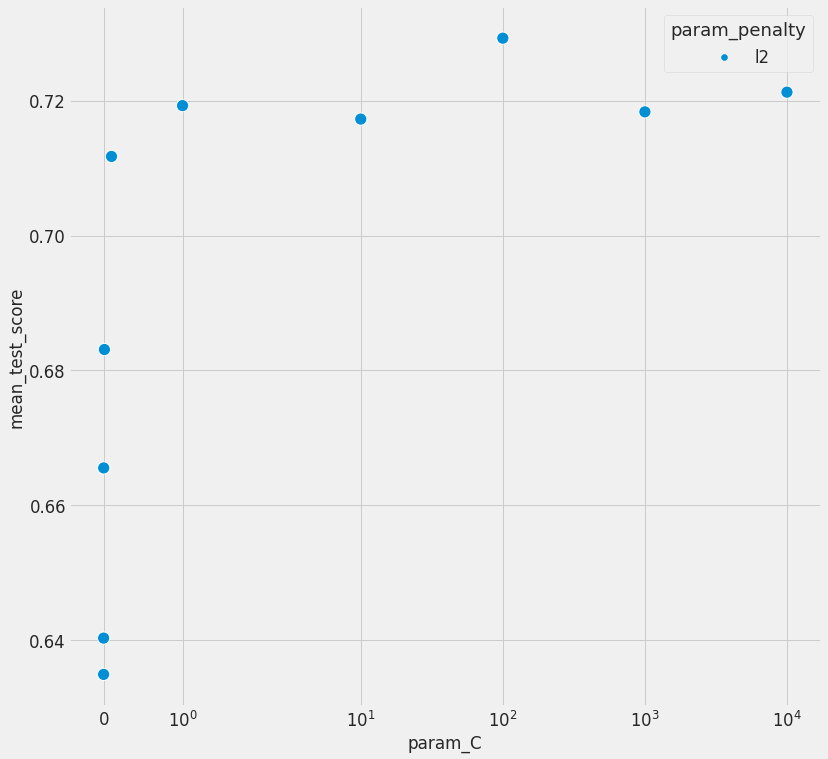

In [130]:
#The most successful 10 parametres on a chart.
plt.style.use('fivethirtyeight')

plt.figure(figsize=(12,12))

sns.scatterplot(x = 'param_C', y = 'mean_test_score', hue = 'param_penalty', data = df[0:10], s=150)

plt.xscale('symlog')

#plt.ylim((0.9,1))

plt.show()

In [131]:
parametres = {"C": [10 ** x for x in range (-5, 5, 1)],
                "penalty": ['l1', 'l2']
                }

In [132]:
from sklearn.model_selection import RandomizedSearchCV

import warnings

warnings.filterwarnings('ignore')


rs_cv = RandomizedSearchCV(estimator=logreg,
                           param_distributions = parametres,
                           cv = 10,
                           n_iter = 10,
                           random_state = 111,
                           scoring = 'precision'
                      )

rs_cv.fit(X, y)

RandomizedSearchCV(cv=10, estimator=LogisticRegression(),
                   param_distributions={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1,
                                              1, 10, 100, 1000, 10000],
                                        'penalty': ['l1', 'l2']},
                   random_state=111, scoring='precision')

In [133]:
print("The Best Parametres        : ", rs_cv.best_params_)

print("All Precisions Values      : ", rs_cv.cv_results_['mean_test_score'])

print("The Best Precision Value   : ", rs_cv.best_score_)

The Best Parametres        :  {'penalty': 'l2', 'C': 1}
All Precisions Values      :  [0.64235071 0.68620495 0.76173137 0.76476772        nan 0.76277232
        nan        nan        nan        nan]
The Best Precision Value   :  0.7647677170594412


In [134]:
results_rs = rs_cv.cv_results_

df_rs = pd.DataFrame(results_rs)

In [135]:
results_rs = rs_cv.cv_results_

df_rs = pd.DataFrame(results_rs)

df_rs = df_rs[['param_penalty','param_C', 'mean_test_score']]

df_rs = df_rs.sort_values(by='mean_test_score', ascending = False)

df_rs

,param_penalty,param_C,mean_test_score
3,l2,1,0.764768
5,l2,1000,0.762772
2,l2,10,0.761731
1,l2,0.001,0.686205
0,l2,0.0001,0.642351
4,l1,100,NaN
6,l1,0.01,NaN
7,l1,0.001,NaN
8,l1,1000,NaN
9,l1,0.00001,NaN


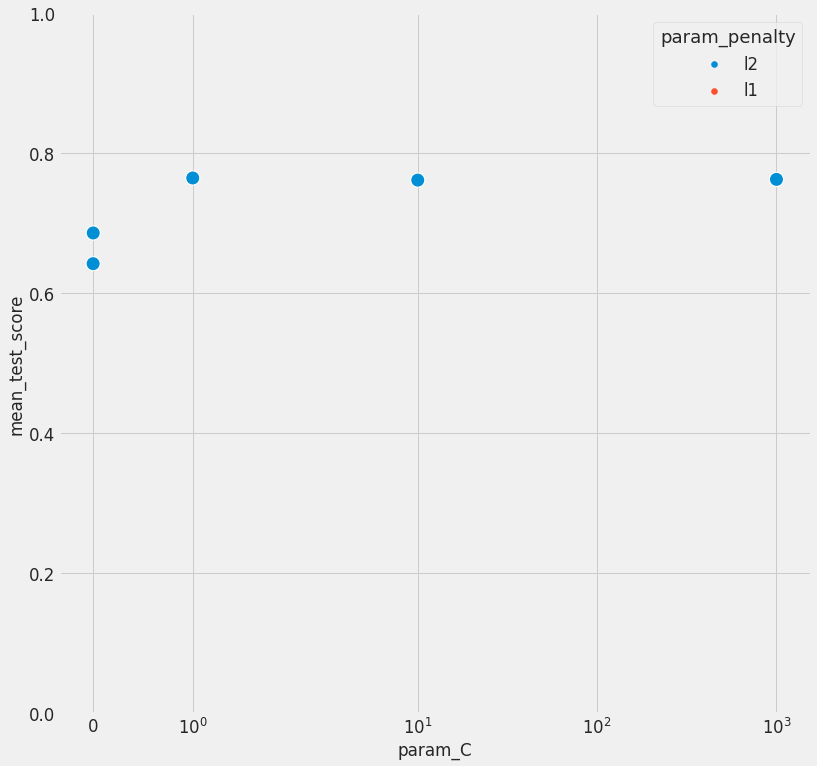

In [136]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(12,12))

sns.scatterplot(x = 'param_C', y = 'mean_test_score', hue = 'param_penalty', data = df_rs, s=200)

plt.xscale('symlog')

plt.ylim((0.0,1))

plt.show()
